In [ ]:
!pip install yfinance
!pip install catboost
!pip install PyPortfolioOpt
!pip install keras-ordered-neurons
!pip install seq2seq-lstm

     |████████████████████████████████| 5.5MB 11.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=e53c5fce19c75e7d63ecec246371a48053fd57e81933ebfa46f3b265efb5bdba
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 65.8MB 53kB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for keras-ordered-neurons: filename=keras_ordered_neurons-0.8.0-cp36-none-any.whl size=11031 sha256=1712bcf68dab621aec259d8763e577a5c3e92bae98f2efa8c309fde79e295403
  Stored in directory: /root/.cache/pip/wheels/12/55/cc/83141fc736306d9f21cf242cd63408dd8b5054f97c7b91c6ea
Successfully built keras-ordered-neurons
  Created wheel for seq2seq-lstm: filename=seq2seq_lstm-0.1.4-cp36-none-any.whl size=14626 sha256=0

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


from pandas_datareader import data as pdr
import yfinance as yf
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import cross_val_predict

import datetime
import catboost
from catboost import CatBoostRegressor, Pool, cv
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
import xgboost as xg
from sklearn.model_selection import GridSearchCV

In [ ]:
hatali

[]

In [ ]:

# In[2]:


data = pdr.get_data_yahoo('AVOD.IS', start="2017-01-01", end="2040-04-30")


# In[3]:


data.head()


# In[4]:


l=['AVOD ', 'A1CAP, ACP ', 'ACSEL ', 'ADEL ', 'ADESE ', 'AFYON ',
       'AGHOL ', 'AKSFA ', 'AKM, AKMEN ', 'AKBNK ', 'AKCNS ', 'AKDFA ',
       'AKYHO ', 'AKENR ', 'AKFGY ', 'AKFEN ', 'ATEKS ', 'AKSGY ',
       'AKMGY ', 'AKSA ', 'AKSEN ', 'AKGRT ', 'AKSUE ', 'AKTVK ',
       'AFB, AKTIF ', 'ALCAR ', 'ALGYO ', 'ALARK ', 'ALBRK, ALK ',
       'ALCTL ', 'ALKIM ', 'ALKA ', 'ALNTF, ANF ', 'AYCES ', 'ALMAD ',
       'ANSGR ', 'AEFES ', 'ANHYT ', 'ASUZU ', 'ANELE ', 'ARCLK ',
       'ARDYZ ', 'ARENA ', 'ARNFK ', 'ARMDA ', 'ARSAN ', 'ARTI ',
       'ASELS ', 'ATAGY ', 'AGYO ', 'ATLFA ', 'ATSYH ', 'ATLAS ',
       'AVISA ', 'AVGYO ', 'AVTUR ', 'AVHOL ', 'AYEN ', 'AYES ', 'AYGAZ ',
      'BAGFS ', 'BAKAB ', 'BALAT ', 'BNTAS ', 'BANVT ', 'BSRFK ',
       'BASCM ', 'BTCIM ', 'BSOKE ', 'BAYRK ', 'BERA ', 'BRKT ', 'BRKSN ',
       'BJKAS ', 'BEYAZ ', 'BLCYT ', 'BIMAS ', 'BRKVY ', 'BRKO ',
       'BRMEN ', 'BIZIM ', 'BOGVY ', 'BRSAN ', 'BRYAT ', 'BFREN ',
       'BOSSA ', 'BRISA ', 'BURCE ', 'BURVA ', 'BUCIM ',  'CRFSA ',
       'CASA ', 'CEOEM ', 'CCOLA ', 'COSMO ', 'CRDFA ',  'CLEBI ',
       'CELHA ', 'CEMAS ', 'CEMTS ', 'CMBTN ', 'CMENT ', 'CIMSA ',
       'CUSAN ', 'DAGI ', 'DAGHL ', 'DARDL ', 'DGATE ', 'DMSAS ',
       'DENVA ', 'DENGE ', 'DENFA ', 'DNFIN ', 'DZGYO ', 'DZY, DZYMK ',
       'DENIZ, DNZ ', 'DERIM ', 'DERAS ', 'DESA ', 'DESPC ', 'DSTKF ',
       'DEVA ', 'DEVIR ', 'DNISI ', 'DIRIT ', 'DITAS ', 'DOCO ', 'DOBUR ',
       'DOHOL ', 'DGKLB ', 'DOGUB ', 'DGGYO ', 'DGHOL ', 'DOAS ',
       'DFKTR ', 'DOKTA ', 'DURDO ', 'DNYVA ', 'DYOBY ',  'ECZYT ',
       'EDIP ', 'EGEEN ', 'EGGUB ', 'EGPRO ', 'EGSER ', 'EPLAS ',
       'ECILC ', 'EKIZ ', 'EKOFA ', 'EMKEL ', 'EMNIS ', 'EKTVK ',
       'EKGYO ', 'ENJSA ', 'ENKAI ', 'ERBOS ', 'EREGL ', 'ERGLI ',
       'EROGL ', 'ERSU ', 'ESCOM ', 'ESEN ', 'ETILR ', 'EUKYO ', 'EUYO ',
       'ETYAT ', 'EUHOL ', 'FADE ', 'FMIZP ', 'FENER ',
       'FBB, FBBNK ', 'FLAP ', 'FONET ', 'FROTO ', 'FORMT ', 'FRIGO ',
        'GSRAY ', 'GARFA ', 'GRFIN ', 'GRNYO ', 'GEDIK ', 'GEDZA ',
       'GENTS ', 'GEREL ', 'GLB, GLBMD ', 'GLYHO ', 'GOODY ', 'GOLTS ',
       'GOZDE ', 'GSDDE ', 'GSDHO ', 'GUBRF ', 'GLRYH ', 'H', 'SAHOL ',
       'HALKF ', 'HLGYO ', 'HLVKS ', 'HATEK ', 'HDFGS ', 'HEKTS ',
       'HSB, HSBCB ', 'HUBVC ', 'HUZFA ', 'HURGZ ',  'ICB, ICBCT ',
       'INVEO ', 'IEYHO ',  'IDEAS ', 'IDGYO ', 'IHEVA ', 'IHLGM ',
       'IHGZT ', 'IHLAS ', 'IHYAY ', 'INDES ', 'INFO, IYF ', 'INTEM ',
       'IPEKE ', 'ISDMR ', 'ISFAK ', 'ISFIN ', 'ISGYO ', 'ISGSY ',
       'ISMEN, IYM ', 'ISYAT ', 'ISBIR ', 'ITTFH ', 'IZTAR ', 'IZMDC ',
       'IZFAS ',  'JANTS ', 'KFEIN ', 'KALES ',
       'KAPTESTAS001, TRAKAPTEST01 ', 'KAPLM ', 'KRDMA, KRDMB, KRDMD ',
       'KAREL ', 'KARSN ', 'KRTEK ', 'KARTN ', 'KATMR ', 'KNTFA ',
       'KENT ', 'KERVT ', 'KRVGD ', 'KERVN ', 'KLGYO ', 'KLMSN ',
       'KFKTF ', 'KOCFN ', 'KCHOL ', 'KNFRT ', 'KONTR ', 'KONYA ',
       'KORDS ', 'KORTS ', 'KOZAL ', 'KOZAA ', 'KRGYO ', 'KRSTL ',
       'KRONT ', 'KTKVK ', 'KSTUR ', 'KUYAS ', 'KUTPO ',  'LIDFA ',
       'LINK ', 'LOGO ', 'LKMNH ', 'LUKSK ',  'MAKTK ', 'MARKA ',
       'MAALT ', 'MRSHL ', 'MRGYO ', 'MARTI ', 'MAVI ', 'MZHLD ',
       'MEGAP ', 'MNDRS ', 'MEPET ', 'MBFTR ', 'MERIT ', 'MERKO ',
       'METUR ', 'METRO ', 'MTRYO ', 'MGROS ', 'MIPAZ ', 'MSGYO ',
       'MPARK ', 'MMCAS ', 'TIRE ', 'NATEN ', 'NTHOL ', 'NETAS ',
       'NIBAS ', 'NUHCM ', 'NUGYO ', 'NRHOL ', 'NURVK ', 'NRBNK, NYB ',
        'ODAS ', 'ODB, ODEA ', 'OLMIP ', 'OPET ', 'ORFIN ', 'ORGE ',
       'ORMA ', 'OMD, OSMEN ', 'OSTIM ', 'OTKAR ', 'OTOKC ', 'OYAKC ',
       'OYA, OYYAT ', 'OYAYO ', 'OYLUM ', 'Ã–', 'OZKGY ', 'OZBAL ',
       'OZGYO ', 'OZRDN ', 'PAMEL ', 'PAGYO ', 'PAPIL ', 'PRKME ',
       'PARSN ', 'PBT, PBTR ', 'PGSUS ', 'PEKGY ', 'PENGD ', 'PEGYO ',
       'PSDTC ', 'PETKM ', 'PKENT ', 'PHC, PHLLP ', 'PETUN ', 'PINSU ',
       'PNSUT ', 'PKART ', 'POLHO ', 'POLTK ', 'PRZMA ',  'QNBFF ',
       'QNBFL ', 'QNBVK ', 'FNY, QNBFI ', 'FIN, QNBFB ', 'RALYH ',
       'RAYSG ', 'RYGYO ', 'RYSAS ', 'RHEAG ', 'RODRG ', 'ROYAL ',
       'RTALB ', 'SAFKR ', 'SANEL ', 'SANFM ', 'SANKO ', 'SAMAT ',
       'SARKY ', 'SARTN ', 'SASA ', 'SAYAS ', 'SEKUR ', 'SELEC ',
       'SELGD ', 'SNKRN ', 'SERVE ', 'SRVGY ', 'SEYKM ', 'SILVR ',
       'SNGYO ', 'SMART ', 'SODSN ', 'SKTAS ', 'SONME ', 'SNPAM ',
       'SUMAS ', 'SMRFA ', 'SMRVA ', 'SEKFA ', 'SEKFK ',
       'SKY, SKYMD ', 'SEK, SKBNK ', 'SOKM ', 'TOKI ', 'TCZ, TCZB ',
       'TAC, TCRYT ', 'TACTR ', 'TAMFA ', 'TATGD ', 'TAVHL ', 'TKURU ',
       'TEBCE ', 'TEKTU ', 'TKFEN ', 'TKNSA ', 'TMPOL ', 'STK, TRMNK ',
       'TFNVK ', 'TGSAS ', 'TOASO ', 'TRGYO ', 'TLMAN ', 'TSPOR ',
       'TDGYO ', 'TSGYO ', 'TUCLK ', 'TUKAS ', 'TRCAS ', 'TCELL ',
       'TBA, TRKSH ', 'TMSN ', 'TUPRS ', 'TEB, TEBNK ', 'THYAO ',
       'PRKAB ', 'TTKOM ', 'TTRAK ', 'TBORG ', 'TURGG ', 'GARAN, TGB ',
       'HALKB, THL ', 'EXIMB, THR ', 'ISATR, ISBTR, ISCTR, ISKUR, TIB ',
       'KLN, KLNMA ', 'TSK, TSKB ', 'TURSG ', 'SISE ', 'TVB, VAKBN ',
       'UFUK ', 'ULAS ', 'ULSFA ', 'ULUSE ', 'ULUUN ', 'UMPAS ', 'USAK ',
       'UTPYA ', 'UZERB ', 'ULKER ', 'UNLUS, UNS ', 'VAKFA ',
       'VAKFN ', 'VKGYO ', 'VKFYO ', 'VAKVK ', 'VAKKO ', 'VANGD ',
       'VERUS ', 'VERTU ', 'VESBE ', 'VESTL ', 'VKING ', 'YKFKT ',
       'YKGYO ', 'YKR, YKYAT ', 'YKB, YKBNK ', 'YAPRK ', 'YATAS ',
       'YAT, YFMEN ', 'YATVK ', 'YAYLA ', 'YDATH ', 'YGGYO ', 'YGYO ',
       'YYAPI ', 'YESIL ', 'YBTAS ', 'YONGA ', 'YKSLN ', 'YUNSA ',
       'ZKBVK ', 'ZOREN ', 'ZORLF ']


# In[5]:



'''tay = pd.Series(l)

tay = tay.apply(lambda x: x.split(',')[0])

lan = [i for i in l if 7 <=  len(i)]

lan = pd.Series(lan).apply(lambda x: x.split(',')[1])

type(tay)

type(len)

lan = np.array(lan)

aq = pd.Series(tay.values).append(pd.Series(lan))'''



aq = aq.reset_index()

aq = aq.drop(['index'],axis=1)


bq = []
for i in range(0,len(aq[0])):
  bq.append(aq[0][i].strip())
  #bq.append(bq)


cq = [suit + '.IS' for suit in bq]

dq = cq + bq

dq = pd.Series(dq)

dq = dq.reset_index()

dq = dq.drop(['index'],axis=1)

net = ['AVOD.IS',
 'ACSEL.IS',
 'ADEL.IS',
 'ADESE.IS',
 'AFYON.IS',
 'AGHOL.IS',
 'AKBNK.IS',
 'AKCNS.IS',
 'AKYHO.IS',
 'AKENR.IS',
 'AKFGY.IS',
 'ATEKS.IS',
 'AKSGY.IS',
 'AKMGY.IS',
 'AKSA.IS',
 'AKSEN.IS',
 'AKGRT.IS',
 'AKSUE.IS',
 'ALCAR.IS',
 'ALGYO.IS',
 'ALARK.IS',
 'ALBRK.IS',
 'ALCTL.IS',
 'ALKIM.IS',
 'ALKA.IS',
 'AYCES.IS',
 'ALMAD.IS',
 'ANSGR.IS',
 'AEFES.IS',
 'ANHYT.IS',
 'ASUZU.IS',
 'ANELE.IS',
 'ARCLK.IS',
 'ARDYZ.IS',
 'ARENA.IS',
 'ARMDA.IS',
 'ARSAN.IS',
 'ARTI.IS',
 'ASELS.IS',
 'ATAGY.IS',
 'AGYO.IS',
 'ATSYH.IS',
 'ATLAS.IS',
 'AVISA.IS',
 'AVGYO.IS',
 'AVTUR.IS',
 'AVHOL.IS',
 'AYEN.IS',
 'AYES.IS',
 'AYGAZ.IS',
 'BAGFS.IS',
 'BAKAB.IS',
 'BALAT.IS',
 'BNTAS.IS',
 'BANVT.IS',
 'BASCM.IS',
 'BTCIM.IS',
 'BSOKE.IS',
 'BAYRK.IS',
 'BERA.IS',
 'BRKSN.IS',
 'BJKAS.IS',
 'BEYAZ.IS',
 'BLCYT.IS',
 'BIMAS.IS',
 'BRKO.IS',
 'BRMEN.IS',
 'BIZIM.IS',
 'BRSAN.IS',
 'BRYAT.IS',
 'BFREN.IS',
 'BOSSA.IS',
 'BRISA.IS',
 'BURCE.IS',
 'BURVA.IS',
 'BUCIM.IS',
 'CRFSA.IS',
 'CASA.IS',
 'CEOEM.IS',
 'CCOLA.IS',
 'COSMO.IS',
 'CRDFA.IS',
 'CLEBI.IS',
 'CELHA.IS',
 'CEMAS.IS',
 'CEMTS.IS',
 'CMBTN.IS',
 'CMENT.IS',
 'CIMSA.IS',
 'CUSAN.IS',
 'DAGI.IS',
 'DAGHL.IS',
 'DARDL.IS',
 'DGATE.IS',
 'DMSAS.IS',
 'DENGE.IS',
 'DZGYO.IS',
 'DERIM.IS',
 'DERAS.IS',
 'DESA.IS',
 'DESPC.IS',
 'DEVA.IS',
 'DNISI.IS',
 'DIRIT.IS',
 'DITAS.IS',
 'DOCO.IS',
 'DOBUR.IS',
 'DOHOL.IS',
 'DGKLB.IS',
 'DOGUB.IS',
 'DGGYO.IS',
 'DOAS.IS',
 'DOKTA.IS',
 'DURDO.IS',
 'DYOBY.IS',
 'ECZYT.IS',
 'EDIP.IS',
 'EGEEN.IS',
 'EGGUB.IS',
 'EGPRO.IS',
 'EGSER.IS',
 'EPLAS.IS',
 'ECILC.IS',
 'EKIZ.IS',
 'EMKEL.IS',
 'EMNIS.IS',
 'EKGYO.IS',
 'ENJSA.IS',
 'ENKAI.IS',
 'ERBOS.IS',
 'EREGL.IS',
 'ERSU.IS',
 'ESCOM.IS',
 'ESEN.IS',
 'ETILR.IS',
 'EUKYO.IS',
 'EUYO.IS',
 'ETYAT.IS',
 'EUHOL.IS',
 'FADE.IS',
 'FMIZP.IS',
 'FENER.IS',
 'FLAP.IS',
 'FONET.IS',
 'FROTO.IS',
 'FORMT.IS',
 'FRIGO.IS',
 'GSRAY.IS',
 'GARFA.IS',
 'GRNYO.IS',
 'GEDIK.IS',
 'GEDZA.IS',
 'GENTS.IS',
 'GEREL.IS',
 'GLYHO.IS',
 'GOODY.IS',
 'GOLTS.IS',
 'GOZDE.IS',
 'GSDDE.IS',
 'GSDHO.IS',
 'GUBRF.IS',
 'GLRYH.IS',
 'SAHOL.IS',
 'HLGYO.IS',
 'HATEK.IS',
 'HDFGS.IS',
 'HEKTS.IS',
 'HUBVC.IS',
 'HURGZ.IS',
 'INVEO.IS',
 'IEYHO.IS',
 'IDEAS.IS',
 'IDGYO.IS',
 'IHEVA.IS',
 'IHLGM.IS',
 'IHGZT.IS',
 'IHLAS.IS',
 'IHYAY.IS',
 'INDES.IS',
 'INFO.IS',
 'INTEM.IS',
 'IPEKE.IS',
 'ISDMR.IS',
 'ISFIN.IS',
 'ISGYO.IS',
 'ISGSY.IS',
 'ISMEN.IS',
 'ISYAT.IS',
 'ISBIR.IS',
 'ITTFH.IS',
 'IZTAR.IS',
 'IZMDC.IS',
 'IZFAS.IS',
 'JANTS.IS',
 'KFEIN.IS',
 'KAPLM.IS',
 'KRDMA.IS',
 'KAREL.IS',
 'KARSN.IS',
 'KRTEK.IS',
 'KARTN.IS',
 'KATMR.IS',
 'KENT.IS',
 'KERVT.IS',
 'KRVGD.IS',
 'KERVN.IS',
 'KLGYO.IS',
 'KLMSN.IS',
 'KCHOL.IS',
 'KNFRT.IS',
 'KONTR.IS',
 'KONYA.IS',
 'KORDS.IS',
 'KOZAL.IS',
 'KOZAA.IS',
 'KRGYO.IS',
 'KRSTL.IS',
 'KRONT.IS',
 'KSTUR.IS',
 'KUYAS.IS',
 'KUTPO.IS',
 'LIDFA.IS',
 'LINK.IS',
 'LOGO.IS',
 'LKMNH.IS',
 'LUKSK.IS',
 'MAKTK.IS',
 'MARKA.IS',
 'MAALT.IS',
 'MRSHL.IS',
 'MRGYO.IS',
 'MARTI.IS',
 'MAVI.IS',
 'MZHLD.IS',
 'MEGAP.IS',
 'MNDRS.IS',
 'MEPET.IS',
 'MERIT.IS',
 'MERKO.IS',
 'METUR.IS',
 'METRO.IS',
 'MTRYO.IS',
 'MGROS.IS',
 'MIPAZ.IS',
 'MSGYO.IS',
 'MPARK.IS',
 'MMCAS.IS',
 'TIRE.IS',
 'NATEN.IS',
 'NTHOL.IS',
 'NETAS.IS',
 'NIBAS.IS',
 'NUHCM.IS',
 'NUGYO.IS',
 'ODAS.IS',
 'OLMIP.IS',
 'ORGE.IS',
 'ORMA.IS',
 'OSTIM.IS',
 'OTKAR.IS',
 'OYAKC.IS',
 'OYAYO.IS',
 'OYLUM.IS',
 'OZKGY.IS',
 'OZBAL.IS',
 'OZGYO.IS',
 'OZRDN.IS',
 'PAMEL.IS',
 'PAGYO.IS',
 'PAPIL.IS',
 'PRKME.IS',
 'PARSN.IS',
 'PGSUS.IS',
 'PEKGY.IS',
 'PENGD.IS',
 'PEGYO.IS',
 'PSDTC.IS',
 'PETKM.IS',
 'PKENT.IS',
 'PETUN.IS',
 'PINSU.IS',
 'PNSUT.IS',
 'PKART.IS',
 'POLHO.IS',
 'POLTK.IS',
 'PRZMA.IS',
 'QNBFL.IS',
 'RALYH.IS',
 'RAYSG.IS',
 'RYGYO.IS',
 'RYSAS.IS',
 'RHEAG.IS',
 'RODRG.IS',
 'ROYAL.IS',
 'RTALB.IS',
 'SAFKR.IS',
 'SANEL.IS',
 'SANFM.IS',
 'SANKO.IS',
 'SAMAT.IS',
 'SARKY.IS',
 'SASA.IS',
 'SAYAS.IS',
 'SEKUR.IS',
 'SELEC.IS',
 'SELGD.IS',
 'SNKRN.IS',
 'SERVE.IS',
 'SRVGY.IS',
 'SEYKM.IS',
 'SILVR.IS',
 'SNGYO.IS',
 'SMART.IS',
 'SODSN.IS',
 'SKTAS.IS',
 'SONME.IS',
 'SNPAM.IS',
 'SUMAS.IS',
 'SEKFK.IS',
 'SOKM.IS',
 'TACTR.IS',
 'TATGD.IS',
 'TAVHL.IS',
 'TKURU.IS',
 'TEKTU.IS',
 'TKFEN.IS',
 'TKNSA.IS',
 'TMPOL.IS',
 'TGSAS.IS',
 'TOASO.IS',
 'TRGYO.IS',
 'TLMAN.IS',
 'TSPOR.IS',
 'TDGYO.IS',
 'TSGYO.IS',
 'TUCLK.IS',
 'TUKAS.IS',
 'TRCAS.IS',
 'TCELL.IS',
 'TMSN.IS',
 'TUPRS.IS',
 'THYAO.IS',
 'PRKAB.IS',
 'TTKOM.IS',
 'TTRAK.IS',
 'TBORG.IS',
 'TURGG.IS',
 'GARAN.IS',
 'HALKB.IS',
 'ISATR.IS',
 'TURSG.IS',
 'SISE.IS',
 'UFUK.IS',
 'ULAS.IS',
 'ULUSE.IS',
 'ULUUN.IS',
 'UMPAS.IS',
 'USAK.IS',
 'UTPYA.IS',
 'UZERB.IS',
 'ULKER.IS',
 'VAKFN.IS',
 'VKGYO.IS',
 'VKFYO.IS',
 'VAKKO.IS',
 'VANGD.IS',
 'VERUS.IS',
 'VERTU.IS',
 'VESBE.IS',
 'VESTL.IS',
 'VKING.IS',
 'YKGYO.IS',
 'YAPRK.IS',
 'YATAS.IS',
 'YAYLA.IS',
 'YGGYO.IS',
 'YGYO.IS',
 'YYAPI.IS',
 'YESIL.IS',
 'YBTAS.IS',
 'YONGA.IS',
 'YKSLN.IS',
 'YUNSA.IS',
 'ZOREN.IS',
 'GLBMD.IS',
 'ICBCT.IS',
 'KRDMB.IS',
 'OSMEN.IS',
 'QNBFB.IS',
 'SKBNK.IS',
 'TEBNK.IS',
 'ISBTR.IS',
 'KLNMA.IS',
 'TSKB.IS',
 'VAKBN.IS',
 'YKBNK.IS',
 'AFB',
 'ALNTF',
 'ARTI',
 'BRKO',
 'CASA',
 'DAGI',
 'GLB',
 'H',
 'HSB',
 'ICB',
 'INFO',
 'KENT',
 'LINK',
 'PBT',
 'PHC',
 'FNY',
 'FIN',
 'SASA',
 'SKY',
 'TAC',
 'STK',
 'TBA',
 'TSK',
 'USAK',
 'ACP',
 'ALK',
 'ANF',
 'IYF',
 'IYM',
 'TGB',
 'THR']

net = pd.Series(net)

net = net.reset_index()

net = net.drop(['index'],axis=1)


hatali = []
print('SA')
data = pdr.get_data_yahoo('AVOD.IS', start="2017-01-01", end="2040-04-30")
data = data.rename(columns={"Adj Close": 'AVOD.IS'.strip()})
data = data.reset_index()
data = data[['Date','AVOD.IS'.strip()]]
data_merge = data

for symbol in range(1,len(net)): #len(dq)):
    try:
        print(net[0][symbol].strip())
        data_new = pdr.get_data_yahoo(net[0][symbol].strip(), start="2015-01-01", end="2042-01-1")
        data_new = data_new.rename(columns={"Adj Close": net[0][symbol].strip()})
        data_new = data_new.reset_index()
        data_new = data_new[['Date',net[0][symbol].strip()]]
        data_merge = pd.merge(data_merge,data_new,on='Date',how='outer')
    except:
        print("hatalı",net[0][symbol].strip())
        hatali.append(net[0][symbol].strip())
        pass



# In[21]:

#data_merge = data_merge.drop(['AAPL'],axis=1)
#data_merge = data_merge.set_index('Date')


# In[22]:


data_merge



SA
ACSEL.IS
ADEL.IS
ADESE.IS
AFYON.IS
AGHOL.IS
AKBNK.IS
AKCNS.IS
AKYHO.IS
AKENR.IS
AKFGY.IS
ATEKS.IS
AKSGY.IS
AKMGY.IS
AKSA.IS
AKSEN.IS
AKGRT.IS
AKSUE.IS
ALCAR.IS
ALGYO.IS
ALARK.IS
ALBRK.IS
ALCTL.IS
ALKIM.IS
ALKA.IS
AYCES.IS
ALMAD.IS
ANSGR.IS
AEFES.IS
ANHYT.IS
ASUZU.IS
ANELE.IS
ARCLK.IS
ARDYZ.IS
ARENA.IS
ARMDA.IS
ARSAN.IS
ARTI.IS
ASELS.IS
ATAGY.IS
AGYO.IS
ATSYH.IS
ATLAS.IS
AVISA.IS
AVGYO.IS
AVTUR.IS
AVHOL.IS
AYEN.IS
AYES.IS
AYGAZ.IS
BAGFS.IS
BAKAB.IS
BALAT.IS
BNTAS.IS
BANVT.IS
BASCM.IS
BTCIM.IS
BSOKE.IS
BAYRK.IS
BERA.IS
BRKSN.IS
BJKAS.IS
BEYAZ.IS
BLCYT.IS
BIMAS.IS
BRKO.IS
BRMEN.IS
BIZIM.IS
BRSAN.IS
BRYAT.IS
BFREN.IS
BOSSA.IS
BRISA.IS
BURCE.IS
BURVA.IS
BUCIM.IS
CRFSA.IS
CASA.IS
CEOEM.IS
CCOLA.IS
COSMO.IS
CRDFA.IS
CLEBI.IS
CELHA.IS
CEMAS.IS
CEMTS.IS
CMBTN.IS
CMENT.IS
CIMSA.IS
CUSAN.IS
DAGI.IS
DAGHL.IS
DARDL.IS
DGATE.IS
DMSAS.IS
DENGE.IS
DZGYO.IS
DERIM.IS
DERAS.IS
DESA.IS
DESPC.IS
DEVA.IS
DNISI.IS
DIRIT.IS
DITAS.IS
DOCO.IS
DOBUR.IS
DOHOL.IS
DGKLB.IS
DOGUB.IS
DGGYO.IS
DOAS.IS
DOKTA.IS
DURD

,Date,AVOD.IS,ACSEL.IS,ADEL.IS,ADESE.IS,AFYON.IS,AGHOL.IS,AKBNK.IS,AKCNS.IS,AKYHO.IS,AKENR.IS,AKFGY.IS,ATEKS.IS,AKSGY.IS,AKMGY.IS,AKSA.IS,AKSEN.IS,AKGRT.IS,AKSUE.IS,ALCAR.IS,ALGYO.IS,ALARK.IS,ALBRK.IS,ALCTL.IS,ALKIM.IS,ALKA.IS,AYCES.IS,ALMAD.IS,ANSGR.IS,AEFES.IS,ANHYT.IS,ASUZU.IS,ANELE.IS,ARCLK.IS,ARDYZ.IS,ARENA.IS,ARMDA.IS,ARSAN.IS,ARTI.IS,ASELS.IS,...,OSMEN.IS,QNBFB.IS,SKBNK.IS,TEBNK.IS,ISBTR.IS,KLNMA.IS,TSKB.IS,VAKBN.IS,YKBNK.IS,AFB,ALNTF,ARTI,BRKO,CASA,DAGI,GLB,H,HSB,ICB,INFO,KENT,LINK,PBT,PHC,FNY,FIN,SASA,SKY,TAC,STK,TBA,TSK,USAK,ACP,ALK,ANF,IYF,IYM,TGB,THR
0,2017-01-02,1.25,2.815319,12.885905,1.83,2.95304,12.512802,6.197257,10.095474,NaN,0.85,1.31,8.581648,1.932271,13.044615,3.255887,2.96,1.407645,3.98647,34.381203,4.800737,1.659318,1.002361,6.84,16.142979,1.744128,2.99214,NaN,1.560464,14.468439,3.637619,5.84101,0.605572,18.415598,NaN,4.093483,6.46,1.38,0.53,5.929278,...,2.825029,4.482810,1.18,NaN,974.229736,1.626463,0.961720,4.162422,2.20912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-03,1.22,2.703080,12.551414,1.83,2.90226,12.541155,6.069643,10.073399,NaN,0.84,1.31,8.440095,1.939272,12.916223,3.340913,2.90,1.413660,4.00059,34.522182,4.718520,1.629223,0.994005,6.78,16.088562,1.786155,3.05199,NaN,1.576635,14.761291,3.607618,5.59890,0.592115,18.007545,NaN,4.027459,6.38,1.34,0.51,5.837240,...,2.979297,4.473475,1.19,5.95,974.229736,1.614327,0.941106,4.104611,2.17047,11.107412,NaN,NaN,0.1400,NaN,NaN,0.13,54.780296,17.820000,98.783798,35.602459,NaN,7.010,5.979451,NaN,31.345682,2.50,NaN,14.237768,5.050424,12.389283,0.876,4.053,9.55,8.272316,82.422668,10.365561,47.363144,78.015411,0.92,19.639999
2,2017-01-04,1.18,2.637608,12.400094,1.83,2.88412,12.493901,5.981908,10.066041,NaN,0.84,1.31,8.475484,1.925270,13.044615,3.294854,2.87,1.401629,3.98647,34.204975,4.668696,1.632980,0.994005,6.91,15.988805,1.842191,3.02206,NaN,1.560464,15.077885,3.607618,5.58376,0.592115,17.759167,NaN,4.027459,6.23,1.33,0.51,5.890525,...,2.651478,4.445456,1.19,5.95,959.241577,1.638599,0.947984,4.046799,2.15115,11.212716,NaN,NaN,0.1400,NaN,NaN,0.13,54.917492,17.770000,96.227600,35.879986,NaN,7.065,5.979451,NaN,31.822123,2.50,NaN,14.132233,5.096337,12.562934,0.909,4.218,9.93,8.370726,83.527878,10.973288,47.891296,79.348915,1.01,19.820000
3,2017-01-05,1.18,2.600195,12.392132,1.82,2.88774,12.503352,5.981908,9.977743,NaN,0.84,1.29,8.360472,1.932271,13.057455,3.291313,2.90,1.395614,3.99118,34.293091,4.845573,1.629223,0.994005,6.90,15.689523,1.905232,3.01459,NaN,1.552379,14.848354,3.622618,5.63219,0.592115,17.741425,NaN,4.065187,6.28,1.33,0.50,5.943811,...,2.747895,4.389419,1.17,5.95,959.241577,1.675017,0.954852,4.037164,2.15115,11.296957,NaN,NaN,0.1400,NaN,NaN,0.10,54.143307,17.820000,99.113602,35.969193,NaN,7.065,5.994325,NaN,31.683161,0.42,NaN,14.074668,5.142250,12.215635,0.879,4.125,9.49,8.383025,82.197876,10.416918,47.608696,79.097137,0.99,19.370001
4,2017-01-06,1.20,2.562782,12.431951,1.82,2.89137,12.569507,6.101549,10.080757,NaN,0.84,1.29,8.378166,1.946273,13.083133,3.404686,2.99,1.413660,3.97706,34.328331,4.887925,1.636745,0.994005,6.86,15.762076,1.877214,2.99214,NaN,1.552379,14.998739,3.630119,5.56258,0.587629,17.865614,NaN,4.055755,6.21,1.36,0.50,5.992254,...,2.776821,4.436120,1.19,5.95,959.341431,1.966320,0.961720,4.094975,2.17047,11.221140,NaN,NaN,0.1400,NaN,NaN,0.10,53.868927,17.825001,NaN,36.335918,NaN,7.065,6.031509,NaN,31.653381,2.50,NaN,13.940349,5.142250,12.355890,0.856,4.169,9.67,8.426079,81.467323,10.108777,47.756954,79.031868,0.99,19.040001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
data_merge = data_merge.drop(['H'],axis=1)

In [ ]:
data_merge.shape

(1559, 427)

In [ ]:
port = data_merge.iloc[:,0:215]

In [ ]:
port = port.set_index('Date')
port

,AVOD.IS,ACSEL.IS,ADEL.IS,ADESE.IS,AFYON.IS,AGHOL.IS,AKBNK.IS,AKCNS.IS,AKYHO.IS,AKENR.IS,AKFGY.IS,ATEKS.IS,AKSGY.IS,AKMGY.IS,AKSA.IS,AKSEN.IS,AKGRT.IS,AKSUE.IS,ALCAR.IS,ALGYO.IS,ALARK.IS,ALBRK.IS,ALCTL.IS,ALKIM.IS,ALKA.IS,AYCES.IS,ALMAD.IS,ANSGR.IS,AEFES.IS,ANHYT.IS,ASUZU.IS,ANELE.IS,ARCLK.IS,ARDYZ.IS,ARENA.IS,ARMDA.IS,ARSAN.IS,ARTI.IS,ASELS.IS,ATAGY.IS,...,IHLGM.IS,IHGZT.IS,IHLAS.IS,IHYAY.IS,INDES.IS,INFO.IS,INTEM.IS,IPEKE.IS,ISDMR.IS,ISFIN.IS,ISGYO.IS,ISGSY.IS,ISMEN.IS,ISYAT.IS,ISBIR.IS,ITTFH.IS,IZTAR.IS,IZMDC.IS,IZFAS.IS,JANTS.IS,KFEIN.IS,KAPLM.IS,KRDMA.IS,KAREL.IS,KARSN.IS,KRTEK.IS,KARTN.IS,KATMR.IS,KENT.IS,KERVT.IS,KRVGD.IS,KERVN.IS,KLGYO.IS,KLMSN.IS,KCHOL.IS,KNFRT.IS,KONTR.IS,KONYA.IS,KORDS.IS,KOZAL.IS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-02,1.25,2.815319,12.885905,1.83,2.95304,12.512802,6.197257,10.095474,NaN,0.85,1.31,8.581648,1.932271,13.044615,3.255887,2.96,1.407645,3.98647,34.381203,4.800737,1.659318,1.002361,6.84,16.142979,1.744128,2.99214,NaN,1.560464,14.468439,3.637619,5.84101,0.605572,18.415598,NaN,4.093483,6.46,1.38,0.53,5.929278,4.63,...,0.68,0.346666,0.29,0.23,6.478374,1.051083,6.15017,2.09,1.178228,0.958340,1.235183,NaN,0.809667,0.496012,99.791679,1.17333,0.833450,2.67,1.02667,16.484529,NaN,0.97,1.255126,1.90,1.066140,0.41,235.442688,3.77638,128.199997,1.53437,NaN,0.22,1.55,6.009266,12.331248,3.050,NaN,252.155350,5.405050,16.320000
2017-01-03,1.22,2.703080,12.551414,1.83,2.90226,12.541155,6.069643,10.073399,NaN,0.84,1.31,8.440095,1.939272,12.916223,3.340913,2.90,1.413660,4.00059,34.522182,4.718520,1.629223,0.994005,6.78,16.088562,1.786155,3.05199,NaN,1.576635,14.761291,3.607618,5.59890,0.592115,18.007545,NaN,4.027459,6.38,1.34,0.51,5.837240,4.59,...,0.68,0.333333,0.29,0.24,6.440266,1.032145,6.03776,2.07,1.178228,0.949706,1.227261,NaN,0.803341,0.496012,98.030655,1.14667,0.833450,2.66,1.02667,16.312160,NaN,0.97,1.228421,2.28,1.038330,0.42,228.555252,3.67348,127.099998,1.69972,NaN,0.23,1.53,5.970242,12.137853,3.005,NaN,247.417374,5.613900,16.190001
2017-01-04,1.18,2.637608,12.400094,1.83,2.88412,12.493901,5.981908,10.066041,NaN,0.84,1.31,8.475484,1.925270,13.044615,3.294854,2.87,1.401629,3.98647,34.204975,4.668696,1.632980,0.994005,6.91,15.988805,1.842191,3.02206,NaN,1.560464,15.077885,3.607618,5.58376,0.592115,17.759167,NaN,4.027459,6.23,1.33,0.51,5.890525,4.62,...,0.68,0.340000,0.30,0.24,6.341185,1.032145,6.08915,2.04,1.166386,0.941072,1.219349,NaN,0.797015,0.496012,98.813332,1.14000,0.833450,2.69,1.07333,16.186804,NaN,0.99,1.228421,2.35,1.010520,0.42,226.923981,3.62203,127.000000,1.58635,NaN,0.23,1.54,5.915616,12.082597,2.990,NaN,244.858841,5.563776,16.040001
2017-01-05,1.18,2.600195,12.392132,1.82,2.88774,12.503352,5.981908,9.977743,NaN,0.84,1.29,8.360472,1.932271,13.057455,3.291313,2.90,1.395614,3.99118,34.293091,4.845573,1.629223,0.994005,6.90,15.689523,1.905232,3.01459,NaN,1.552379,14.848354,3.622618,5.63219,0.592115,17.741425,NaN,4.065187,6.28,1.33,0.50,5.943811,4.59,...,0.68,0.340000,0.28,0.24,6.348806,1.041614,6.05703,2.04,1.166386,0.949706,1.203514,NaN,0.797015,0.496012,98.030655,1.14667,0.827276,2.70,1.06667,16.061447,NaN,0.96,1.228421,2.45,0.991978,0.41,228.102112,3.67862,129.800003,1.90261,NaN,0.23,1.52,5.853179,12.110225,2.960,NaN,245.806427,5.580484,16.049999
2017-01-06,1.20,2.562782,12.431951,1.82,2.89137,12.569507,6.101549,10.080757,NaN,0.84,1.29,8.378166,1.946273,13.083133,3.404686,2.99,1.413660,3.97706,34.328331,4.887925,1.636745,0.994005,6.86,15.762076,1.877214,2.99214,NaN,1.552379,14.998739,3.630119,5.56258,0.587629,17.865614,NaN,4.055755,6.21,1.36,0.50,5.992254,4.61,...,0.68,0.333333,0.28,0.24,6.364049,1.041614,6.06024,2.07,1.178228,0.923805,1.203514,NaN,0.790690,0.501126,99.302505,1.15333,0.827276,2.75,1.07333,16.296492,NaN,0.97,1.237322,2.38,1.019790,0.41,236.077057,3.71464,138.500000,1.91344,NaN,0.23,1.58,5.837567,12.266782,2.970,NaN,251.586792,5.613900,16.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

BURADAN BAŞLA

In [ ]:
df = pd.read_csv('stock_predict_future')
df = df.drop(df.columns[0],axis=1)
port = df.set_index('ds')
port=port.iloc[:,0:150]

PORTFOLIO OPTIMIZE

In [ ]:
returns = port.pct_change()
weights = np.array([1/(port.shape[1]) for i in range(0,port.shape[1])])
weights


cov_matrix_annual=returns.cov()*252
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_volatility = np.sqrt(port_variance)
port_simple_annual_return = np.sum(returns.mean()*weights)*252


print('Annual Variance='+str(round(port_variance,2)),
        'Annual Volatility='+str(round(port_volatility,2)),
'Expected annual return='+str(round(port_simple_annual_return,2)))



Annual Variance=47.94 Annual Volatility=6.92 Expected annual return=-4.19


In [ ]:
mu = expected_returns.mean_historical_return(port)
S = risk_models.sample_cov(port)
ef = EfficientFrontier(mu,S)
#weights = ef.min_volatility()
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

/usr/local/lib/python3.6/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.6/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn("Could not fix matrix. Please try a different risk model.")


OrderedDict([('AVOD.IS', 0.0), ('ACSEL.IS', 0.0), ('ADEL.IS', 0.0), ('ADESE.IS', 0.0), ('AFYON.IS', 0.00051), ('AGHOL.IS', 0.0), ('AKBNK.IS', 0.1318), ('AKCNS.IS', 0.0), ('AKENR.IS', 0.0), ('AKFGY.IS', 0.0), ('ATEKS.IS', 0.0), ('AKSGY.IS', 0.0), ('AKMGY.IS', 0.0), ('AKSA.IS', 0.0), ('AKSEN.IS', 0.0), ('AKGRT.IS', 0.0), ('AKSUE.IS', 0.0), ('ALCAR.IS', 0.0), ('ALGYO.IS', 0.0), ('ALARK.IS', 0.0), ('ALBRK.IS', 0.0), ('ALCTL.IS', 0.0), ('ALKIM.IS', 0.0), ('ALKA.IS', 0.0), ('AYCES.IS', 0.0), ('ANSGR.IS', 0.0), ('AEFES.IS', 0.08393), ('ANHYT.IS', 0.0), ('ASUZU.IS', 0.0), ('ANELE.IS', 0.0), ('ARCLK.IS', 0.0), ('ARDYZ.IS', 0.3483), ('ARENA.IS', 0.0), ('ARMDA.IS', 0.0), ('ARSAN.IS', 0.0), ('ARTI.IS', 0.0), ('ASELS.IS', 0.0), ('ATAGY.IS', 0.0), ('AGYO.IS', 0.0), ('ATSYH.IS', 0.0), ('ATLAS.IS', 0.00589), ('AVISA.IS', 0.0), ('AVGYO.IS', 0.0), ('AVTUR.IS', 0.0), ('AVHOL.IS', 0.0), ('AYEN.IS', 0.0), ('AYES.IS', 0.01566), ('AYGAZ.IS', 0.0), ('BAGFS.IS', 0.0), ('BAKAB.IS', 0.0), ('BALAT.IS', 0.0), ('BN

(1.6021814701964467, 0.04687094724381416, 33.7561232113835)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(port)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value=100000)
allocation, leftover = da.lp_portfolio()
print('allocation='+str(allocation),'leftover='+str(leftover))

allocation={'AFYON.IS': 11, 'AKBNK.IS': 2232, 'AEFES.IS': 346, 'ARDYZ.IS': 764, 'ATLAS.IS': 291, 'AYES.IS': 134, 'BAYRK.IS': 708, 'BUCIM.IS': 356, 'CEOEM.IS': 912, 'CRDFA.IS': 15, 'CEMAS.IS': 255, 'DERAS.IS': 295, 'DIRIT.IS': 1082, 'DOHOL.IS': 72, 'DURDO.IS': 1, 'FADE.IS': 918, 'FORMT.IS': 53, 'GARFA.IS': 146, 'GEDIK.IS': 82, 'GENTS.IS': 794} leftover=1.9647105830081273


** MONEY FLOW INDEX**

In [ ]:
df = pdr.get_data_yahoo('MIGROS.IS', start="2017-01-01", end="2040-04-30")

RemoteDataError: ignored

In [ ]:
typical_price = (df['Close'] + df['High'] + df['Low'])/3

In [ ]:
period = 14
money_flow = typical_price*df['Volume']

positive_flow=[]
negative_flow=[]
for i in range(1,len(typical_price)):
  if typical_price[i]>typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i]<typical_price[i-1]:
    positive_flow.append(0)
    negative_flow.append(money_flow[i-1])
  else:
    positive_flow.append(0)
    negative_flow.append(0)

positive_mf = []
negative_mf = []
for i in range(period-1,len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period:i+1]))
  



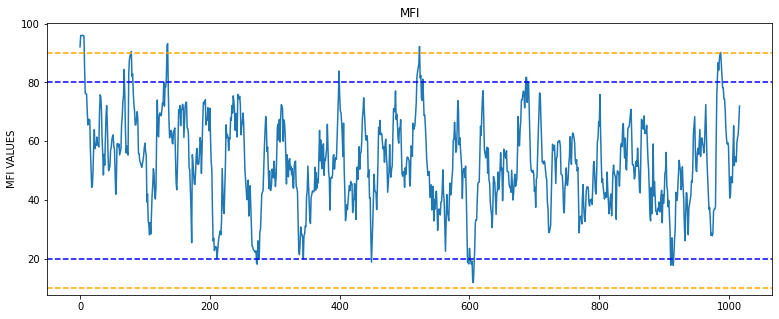

In [ ]:
mfi = 100*(np.array(positive_mf)/(np.array(positive_mf) + np.array(negative_mf)))
mfi_df = pd.DataFrame()
mfi_df['MFI'] = mfi
plt.figure(figsize=[13,5])
plt.plot(mfi_df['MFI'],label='MFI')
plt.axhline(10,linestyle='--', color='orange')
plt.axhline(20,linestyle='--', color='blue')
plt.axhline(80,linestyle='--', color='blue')
plt.axhline(90,linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI VALUES')
plt.show()

In [ ]:
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def get_signal(data,high,low):
  buy = []
  sell = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i]>high:
      buy.append(np.nan)
      sell.append(data['Close'][i])
    elif data['MFI'][i]<low:
      buy.append(data['Close'][i])
      sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return (buy,sell)


In [ ]:
new_df['Buy'] = get_signal(new_df,80,20)[0]
new_df['Sell'] = get_signal(new_df,80,20)[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_df = new_df.reset_index()
new_df = new_df.set_index(pd.DatetimeIndex(new_df['Date'].values))


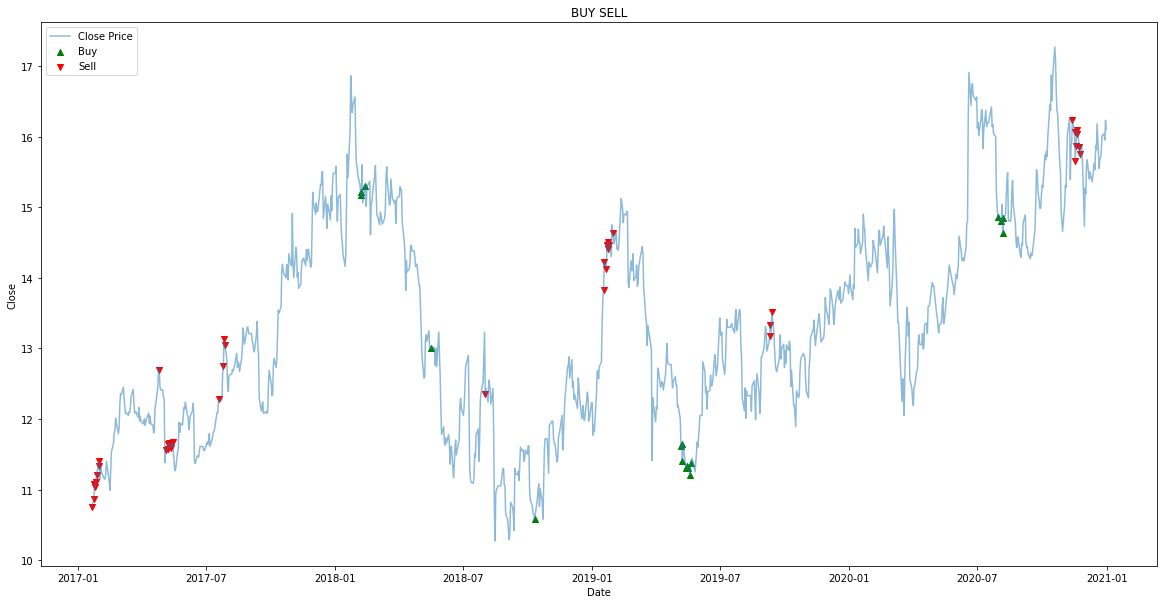

In [ ]:
plt.figure(figsize=[20,10])
plt.plot(new_df['Close'],label='Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'],color='green',label='Buy',marker='^',alpha=1)
plt.scatter(new_df.index, new_df['Sell'],color='red',label='Sell',marker='v',alpha=1)

plt.title('BUY SELL')

plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(loc='upper left')
plt.show()

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,9.70,9.57,9.69,9.57,2614321.0,7.075001
2017-01-03,9.57,9.36,9.57,9.37,5002021.0,6.927144
2017-01-04,9.58,9.38,9.38,9.58,6030093.0,7.082393
2017-01-05,9.79,9.57,9.62,9.68,5645265.0,7.156323
2017-01-06,9.87,9.63,9.63,9.87,4732101.0,7.296788


In [ ]:
AAPL = pd.DataFrame()
stock = 'GARAN.IS'
AAPL["Adj Close Price"] = df[stock]
#plt.figure(figsize=(20,10))
plt.plot(AAPL["Adj Close Price"], label = stock)
plt.title("Title")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.show()

SMA30 = pd.DataFrame()
SMA30["Adj Close Price"] = AAPL["Adj Close Price"].rolling(window = 30).mean()

SMA100 = pd.DataFrame()
SMA100["Adj Close Price"] = AAPL["Adj Close Price"].rolling(window = 100).mean()

plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL["Adj Close Price"], label = stock)
plt.plot(SMA30["Adj Close Price"], label = "SMA30")
plt.plot(SMA100["Adj Close Price"], label = "SMA100")
plt.title("Title")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.show()

data = pd.DataFrame()
data["AAPL"] = AAPL["Adj Close Price"]
data["SMA30"] = SMA30["Adj Close Price"]
data["SMA100"] = SMA100["Adj Close Price"]

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1

      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

plt.figure(figsize=(12.6,4.6))
plt.plot(data["AAPL"],label = stock,alpha = 0.35)
plt.plot(data["SMA30"],label = "SMA30",alpha = 0.35)
plt.plot(data["SMA100"],label = "SMA100",alpha = 0.35)
plt.scatter(data.index, data["Buy_Signal_Price"],label = "Buy", marker = "^",color = "green")
plt.scatter(data.index, data["Sell_Signal_Price"],label = "Sell", marker = "v",color = "red")
plt.title("title")
plt.xlabel("time")
plt.ylabel("$")
plt.legend(loc = "upper left")
plt.show()

KeyError: ignored

PREDICTION

In [ ]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white',figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    print ('yo')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def build_model(layers):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    
    '''model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))
'''
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("Compilation Time : ", time.time() - start)
    return model

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[np.newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs